# Pymaceuticals Inc.
---

### Analysis Obsevations:
1. Based on the summary statistics table, we see that Ramicane and Capomulin had the smallest average and median tumor size, both about 10 mm^3 smaller than the other drug regimens. This could suggest they're the more effective treatments in the study. 
2. We can see that Capomulin started to really take effect in reducing the tumors around test day 20. It's interesting to see the tumors continue to grow until around dat 20, but the decrease is not linear and actually incerases again before day 30. This could suggest it takes about 20 days for Capomulin to start working. 
3. the correlation between mice weight and average tumor volume was 0.84. This suggests a fairly strong correlation between the weight and tumor size, and makes sense because larger tumors will probably weigh more and contribute to the mouse's total weight. 
 

In [61]:
%matplotlib notebook

In [241]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, how = 'outer', on ='Mouse ID')
# Display the data table for preview
study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [242]:
# Checking the number of mice.
study_data['Mouse ID'].nunique()

249

In [243]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data.loc[study_data.duplicated(subset=["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
print(duplicate)

['g989']


In [244]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data.loc[study_data["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [245]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_stats= study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
study_stats

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [246]:
study_stats.drop(study_stats[study_stats["Mouse ID"]=='g989'].index, inplace=True)

/var/folders/5t/l79k35_54pxg06dsgb146xwh0000gn/T/ipykernel_65064/3444817389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_stats.drop(study_stats[study_stats["Mouse ID"]=='g989'].index, inplace=True)


In [247]:
# Checking the number of mice in the clean DataFrame.
study_stats['Mouse ID'].nunique()

248

## Summary Statistics

In [248]:
tumor_mean = study_stats.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
tumor_med = study_stats.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
tumor_var = study_stats.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
tumor_std = study_stats.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
tumor_sem = study_stats.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

tumor_summary = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_med, "Variance":tumor_var, 
                "Standard deviation": tumor_std, "Standard error of mean":tumor_sem })
tumor_summary

,Mean,Median,Variance,Standard deviation,Standard error of mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [249]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
study_stats.groupby('Drug Regimen').agg(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)']

/var/folders/5t/l79k35_54pxg06dsgb146xwh0000gn/T/ipykernel_65064/4043748549.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  study_stats.groupby('Drug Regimen').agg(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


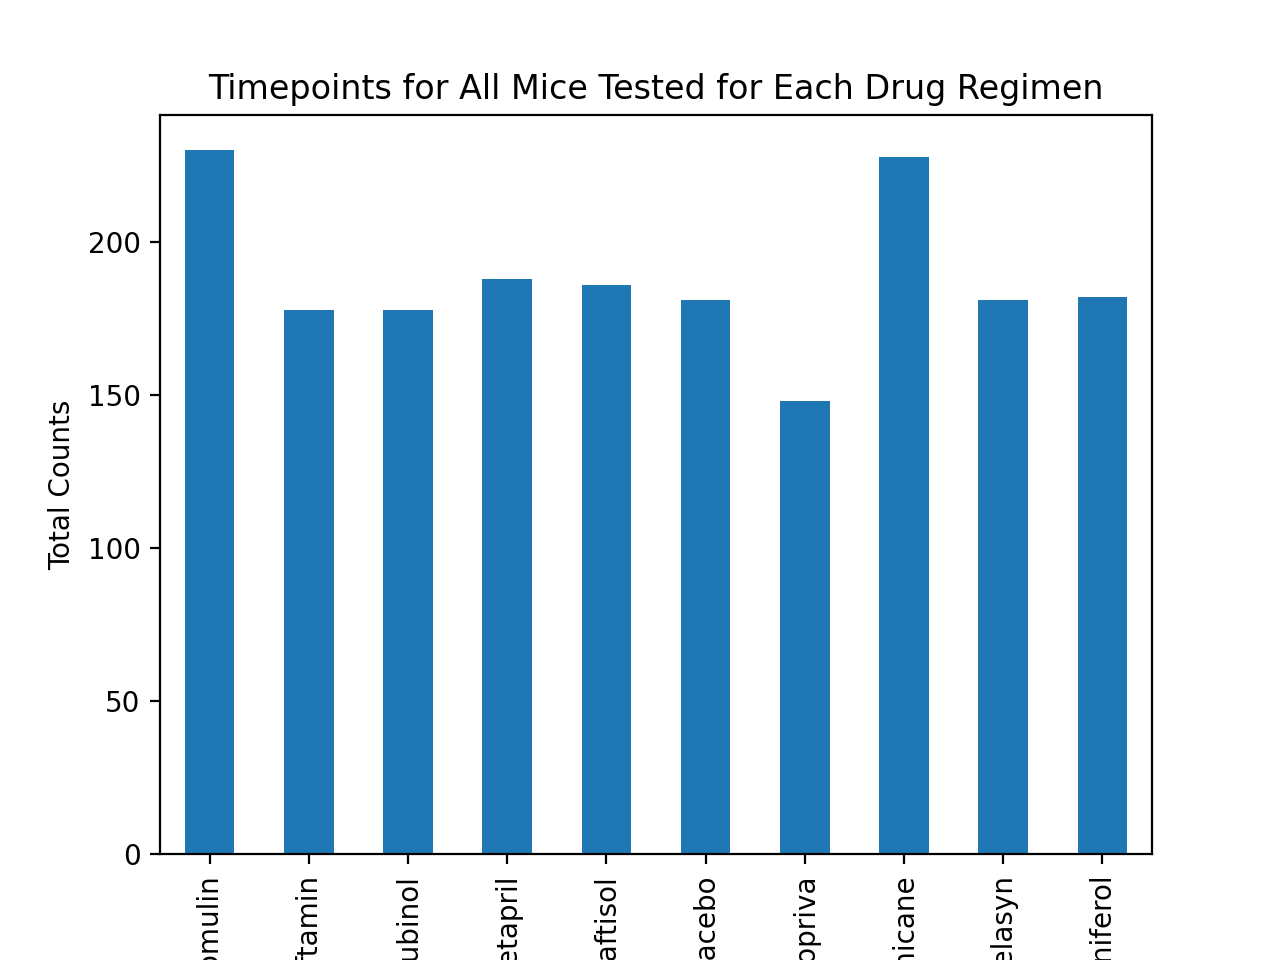

In [251]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = study_stats.groupby("Drug Regimen").count()['Timepoint']
fig1 = timepoints.plot(kind="bar", title="Timepoints for All Mice Tested for Each Drug Regimen", xlabel='Drug Regimen', 
               ylabel = 'Total Counts', align = 'center')
plt.show(fig1)

<IPython.core.display.Javascript object>


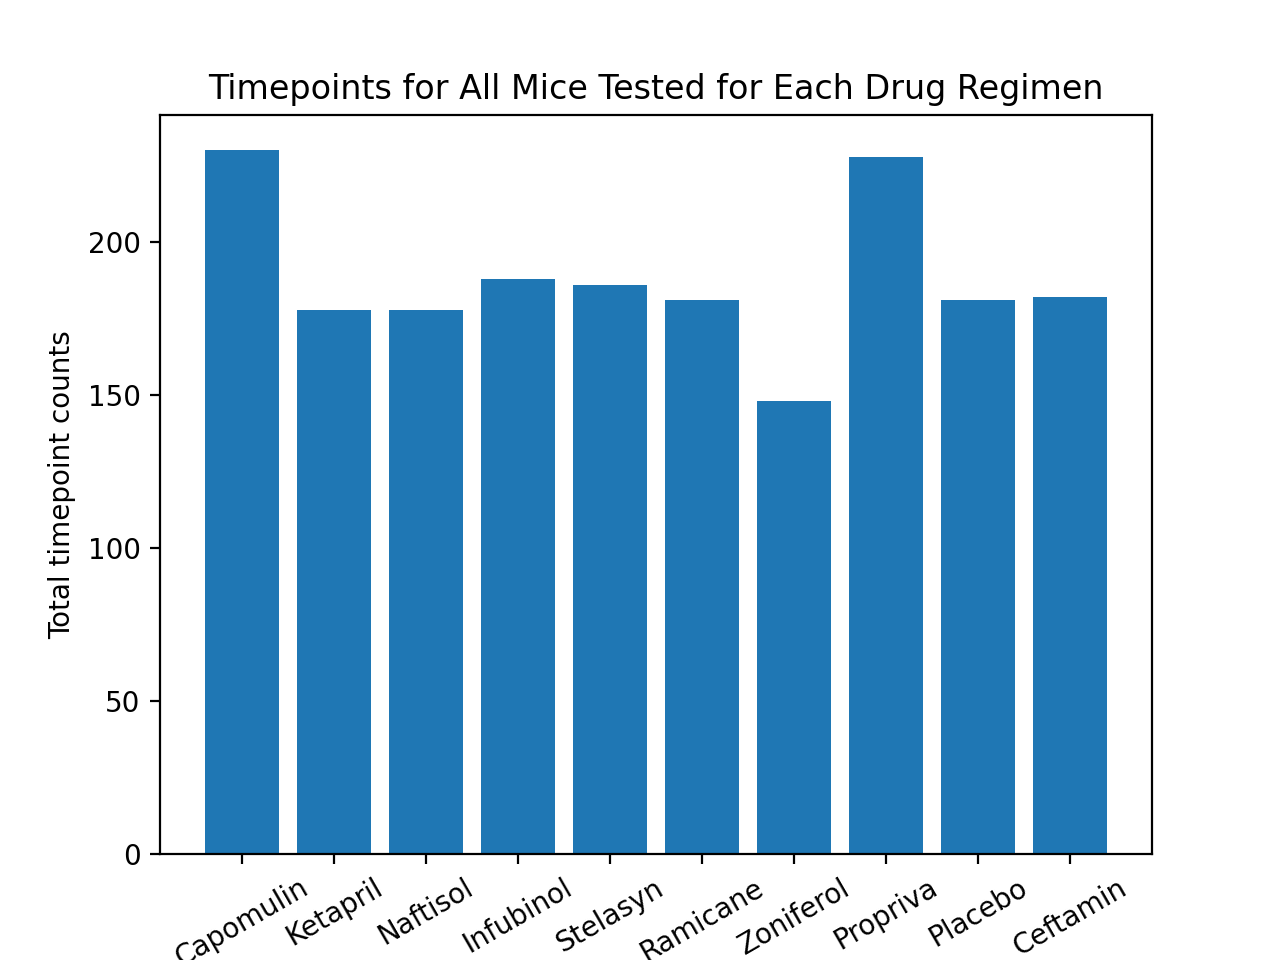

In [252]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = study_stats["Drug Regimen"].unique()
fig2 = plt.bar(drugs, timepoints)
plt.title("Timepoints for All Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('Total timepoint counts')
plt.xticks(rotation = 30)
plt.show()

<IPython.core.display.Javascript object>


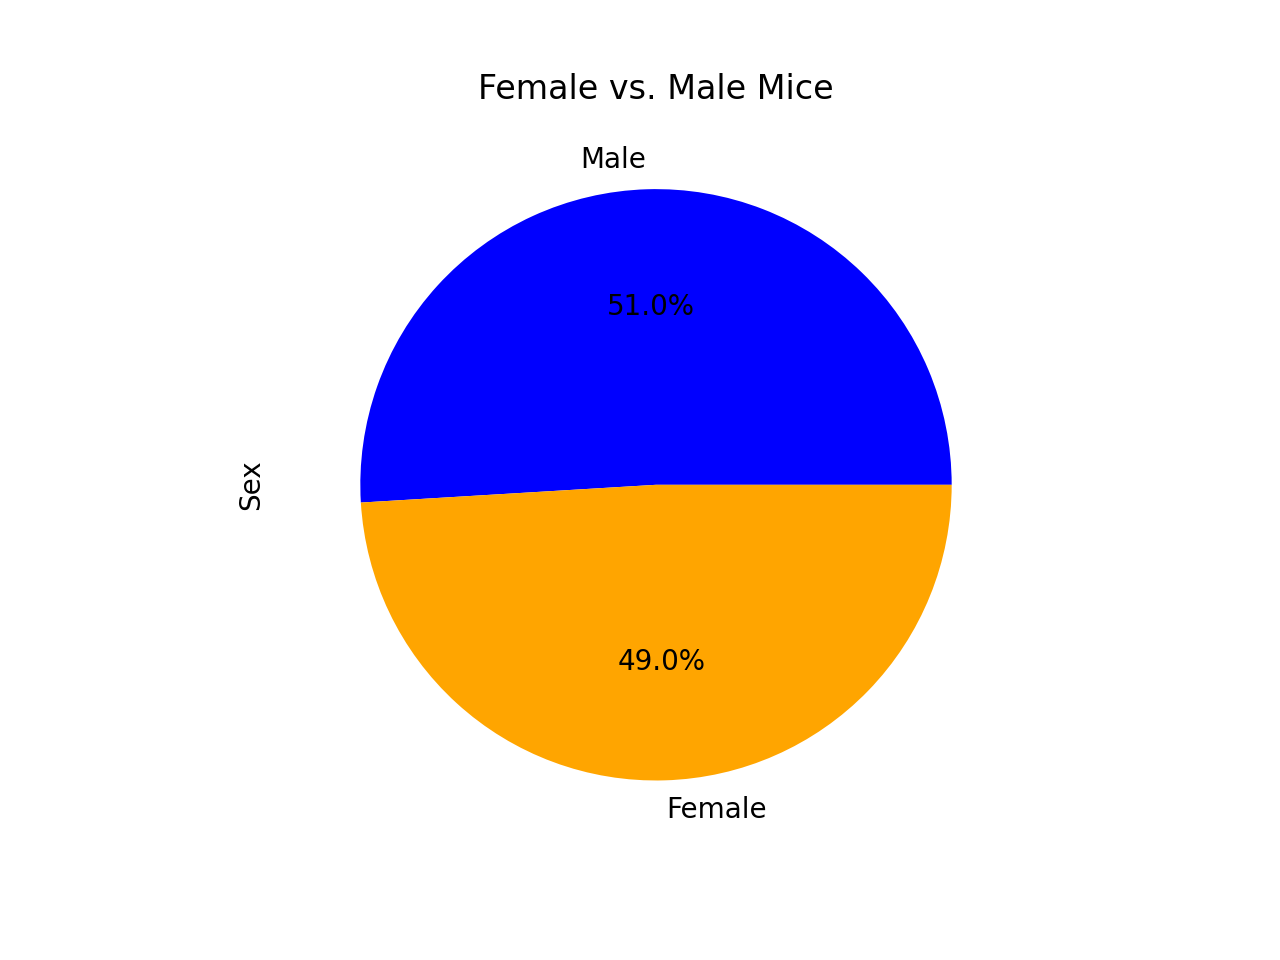

In [253]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
study_sex = study_stats['Sex'].value_counts()
colors = ['blue', 'orange']
study_sex.plot(kind = 'pie', colors = colors, autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()


<IPython.core.display.Javascript object>


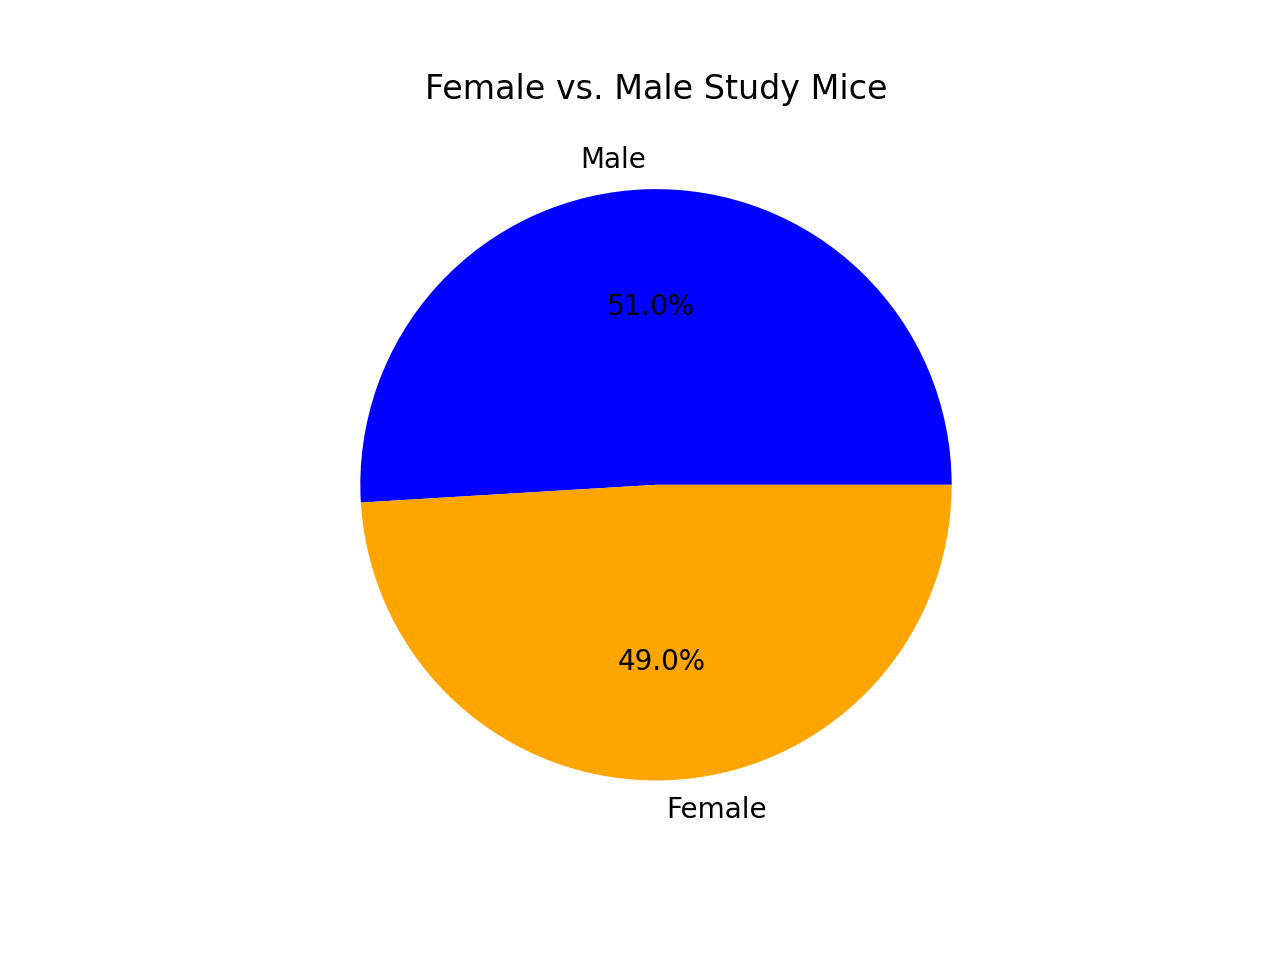

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(study_sex, colors=colors,autopct="%1.1f%%", labels = ['Male', 'Female'])
plt.title('Female vs. Male Study Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [255]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin = study_stats.loc[study_stats['Drug Regimen']=='Capomulin',:]
ramicane = study_stats.loc[study_stats['Drug Regimen']=='Ramicane',:]
infubinol = study_stats.loc[study_stats['Drug Regimen']=='Infubinol',:]
ceftamin = study_stats.loc[study_stats['Drug Regimen']=='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_max = capomulin.groupby("Mouse ID").max()["Timepoint"]
ramicane_max = ramicane.groupby("Mouse ID").max()["Timepoint"]
infub_max = infubinol.groupby("Mouse ID").max()["Timepoint"]
ceftamin_max = ceftamin.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capo_merge = pd.merge(capomulin_max, study_stats, on=("Mouse ID", "Timepoint"), how='left')
rami_merge = pd.merge(ramicane_max, study_stats, on=("Mouse ID", "Timepoint"), how='left')
infub_merge = pd.merge(infub_max, study_stats, on=("Mouse ID", "Timepoint"), how='left')
ceft_merge = pd.merge(ceftamin_max, study_stats, on=("Mouse ID", "Timepoint"), how='left')

In [256]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset  
# Determine outliers using upper and lower bounds
capo_quartiles = capo_merge["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
capo_lower = capo_quartiles[0.25]
capo_upper = capo_quartiles[0.75]
capo_iqr = capo_upper-capo_lower
capo_low = capo_lower - (1.5*capo_iqr)
capo_high = capo_upper + (1.5*capo_iqr)

rami_quartiles = rami_merge["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
rami_lower = rami_quartiles[0.25]
rami_upper = rami_quartiles[0.75]
rami_iqr = rami_upper-rami_lower
rami_low = rami_lower - (1.5*rami_iqr)
rami_high = rami_upper + (1.5*rami_iqr)

infub_quartiles = infub_merge["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
infub_lower = infub_quartiles[0.25]
infub_upper = infub_quartiles[0.75]
infub_iqr = infub_upper-infub_lower
infub_low = infub_lower - (1.5*infub_iqr)
infub_high = infub_upper + (1.5*infub_iqr)

ceft_quartiles = ceft_merge["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
ceft_lower = ceft_quartiles[0.25]
ceft_upper = ceft_quartiles[0.75]
ceft_iqr = ceft_upper-ceft_lower
ceft_low = ceft_lower - (1.5*ceft_iqr)
ceft_high = ceft_upper + (1.5*ceft_iqr)


print(f"Capomulin's potential outliers: tumor volumes below {capo_low.round(2)} or above {capo_high.round(2)} mm^3")
print(f"Ramicane's potential outliers: tumor volumes below {rami_low.round(2)} or above {rami_high.round(2)} mm^3")
print(f"Infubinol's potential outliers: tumor volumes below {infub_low.round(2)} or above {infub_high.round(2)} mm^3")
print(f"Ceftamin's potential outliers: tumor volumes below {ceft_low.round(2)} or above {ceft_high.round(2)} mm^3")


Capomulin's potential outliers: tumor volumes below 20.7 or above 51.83 mm^3
Ramicane's potential outliers: tumor volumes below 17.91 or above 54.31 mm^3
Infubinol's potential outliers: tumor volumes below 36.83 or above 82.74 mm^3
Ceftamin's potential outliers: tumor volumes below 25.36 or above 87.67 mm^3


<IPython.core.display.Javascript object>


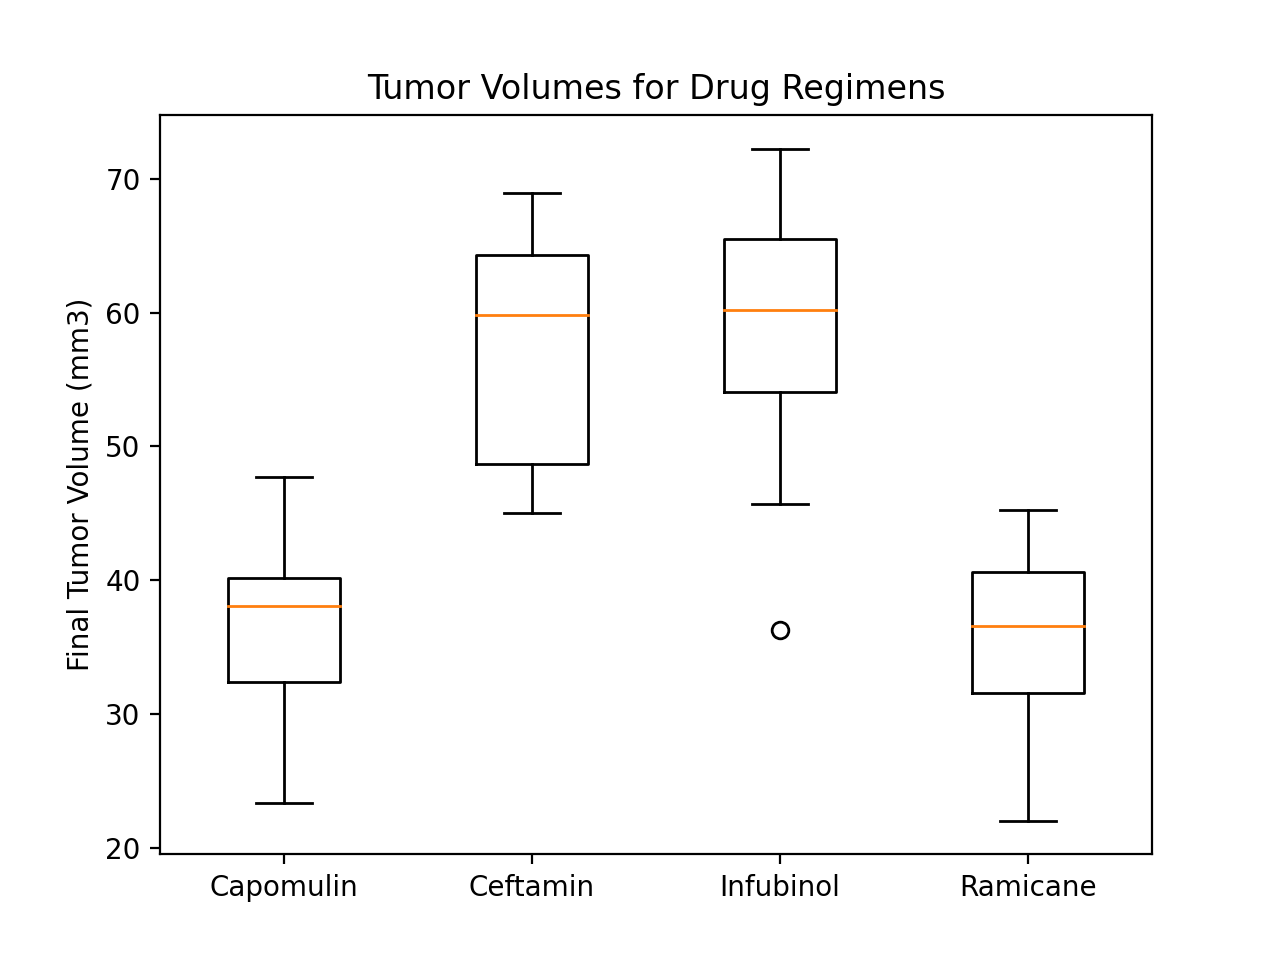

In [257]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# regimens already set to ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
vol_data = [capo_merge["Tumor Volume (mm3)"], ceft_merge["Tumor Volume (mm3)"], infub_merge["Tumor Volume (mm3)"],
             rami_merge["Tumor Volume (mm3)"]]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes for Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(vol_data, labels = regimens)
plt.show()

## Line and Scatter Plots

In [258]:
capomulin[capomulin["Mouse ID"]=='m601']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1883,m601,0,45.000000,0,Capomulin,Male,22,17
1884,m601,5,41.408591,1,Capomulin,Male,22,17
1885,m601,10,36.825367,1,Capomulin,Male,22,17
1886,m601,15,35.464612,1,Capomulin,Male,22,17
1887,m601,20,34.255732,1,Capomulin,Male,22,17
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17
1892,m601,45,28.430964,1,Capomulin,Male,22,17


<IPython.core.display.Javascript object>


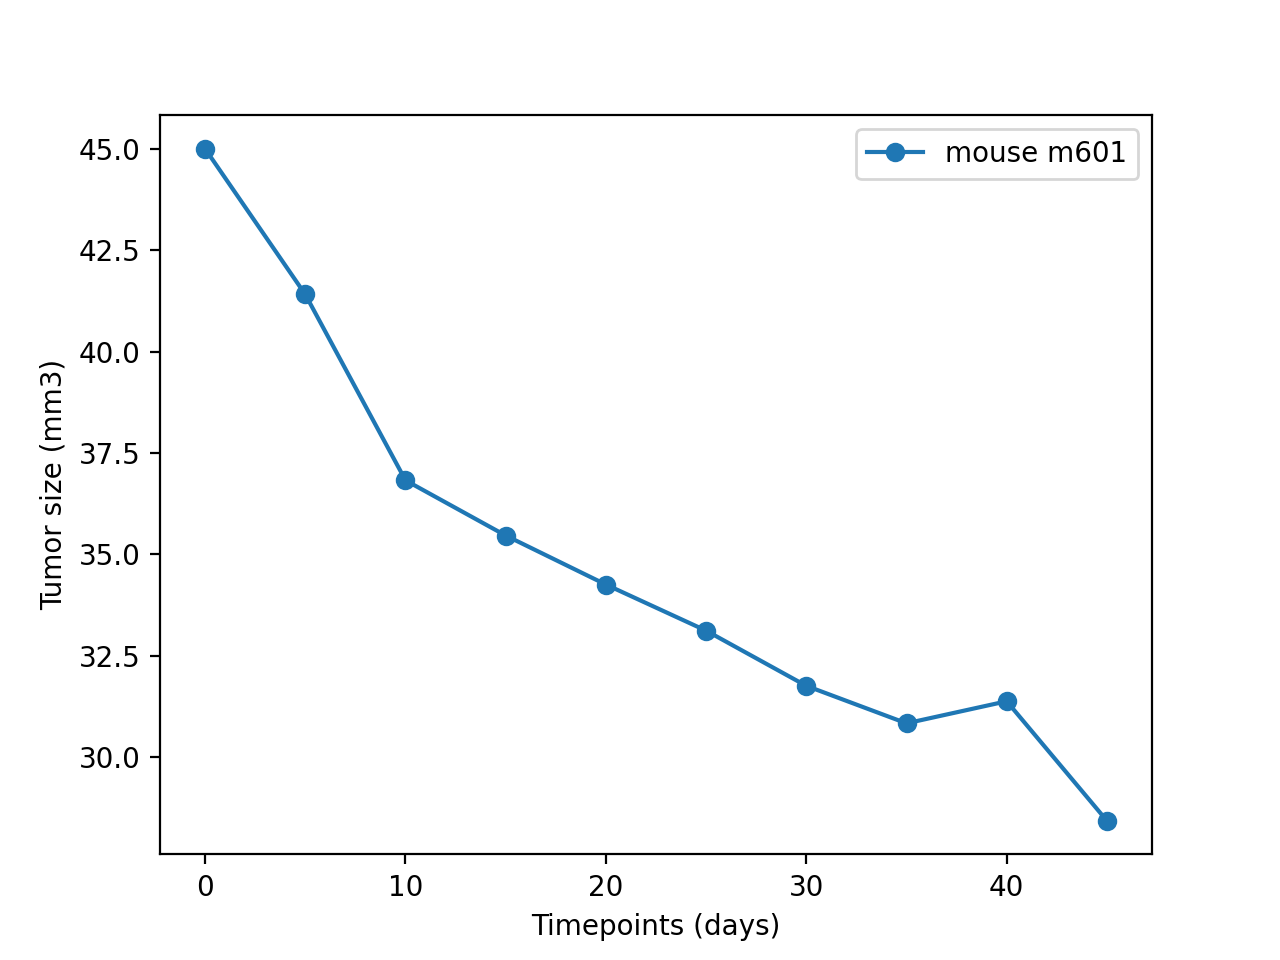

In [259]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_m601 = capomulin.loc[capomulin["Mouse ID"] == "m601",:]
plt.plot(mouse_m601["Timepoint"], mouse_m601["Tumor Volume (mm3)"], marker = 'o', label = 'mouse m601')
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor size (mm3)")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


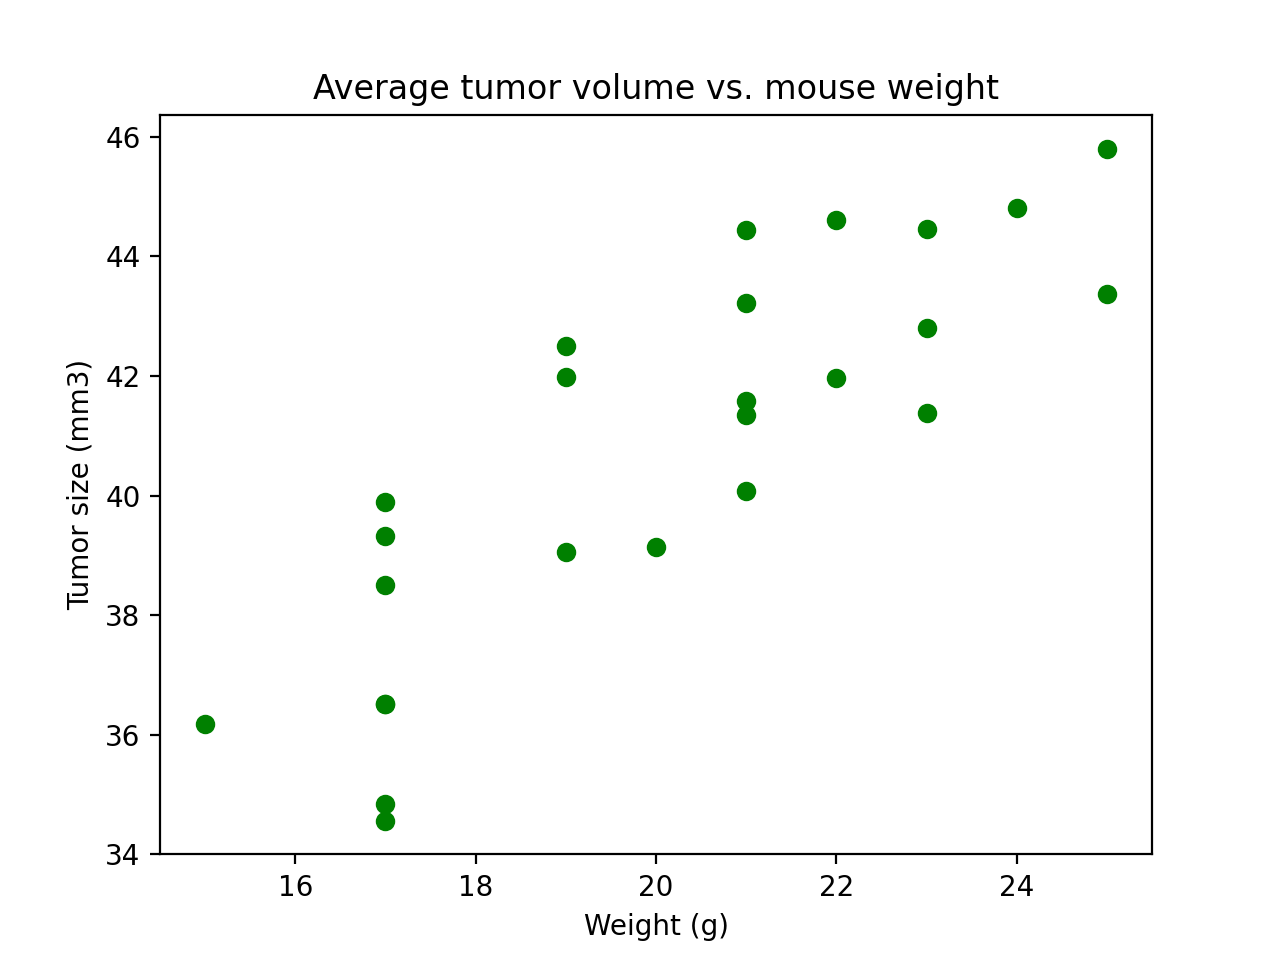

In [260]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumors = capomulin.groupby("Mouse ID").mean()
plt.scatter(avg_tumors["Weight (g)"], avg_tumors["Tumor Volume (mm3)"], color = 'green')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor size (mm3)")
plt.title("Average tumor volume vs. mouse weight")
plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


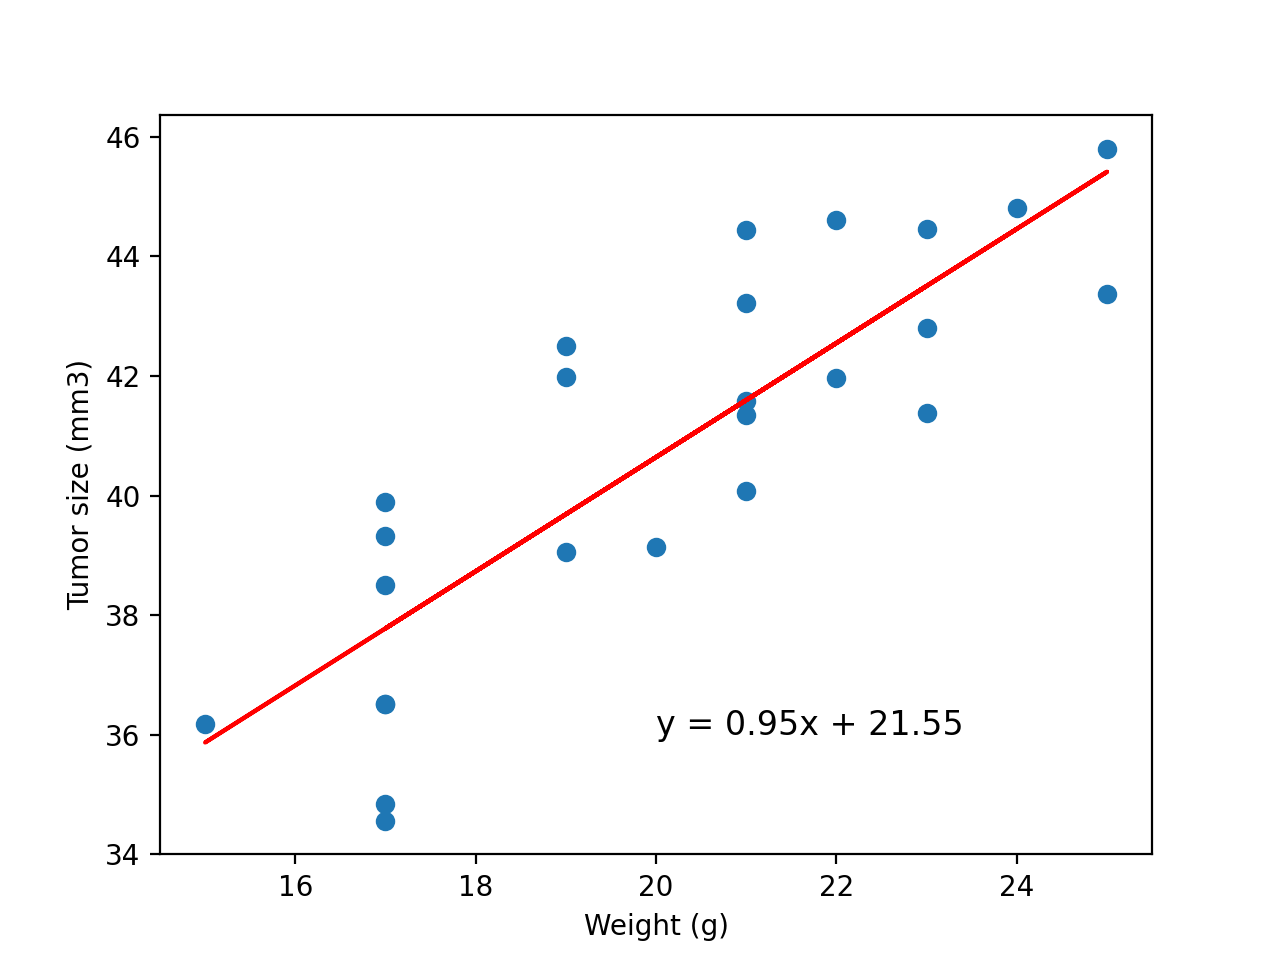

The correlation coefficient between mouse weight and the average tumor volume is 0.841936342469472
The r-squared value is 0.7088568047708723


In [287]:
from scipy.stats import linregress

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tumors["Weight (g)"]
y_values = avg_tumors["Tumor Volume (mm3)"]
(slope, intercept, rval, pval, stderr) = stats.linregress(avg_tumors["Weight (g)"], avg_tumors["Tumor Volume (mm3)"])
regress_val = slope * x_values + intercept 
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_val, "r-")
plt.annotate(line_eq, (20,36), fontsize = 12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor size (mm3)")
plt.show()

corr_coef = st.pearsonr(avg_tumors['Weight (g)'], avg_tumors['Tumor Volume (mm3)'])[0]

print(f"The correlation coefficient between mouse weight and the average tumor volume is {corr_coef}")
print(f"The r-squared value is {rval**2}")